In [546]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

# 1. FFT

Read a row from the image. Collapse RGB into 1 channel. 

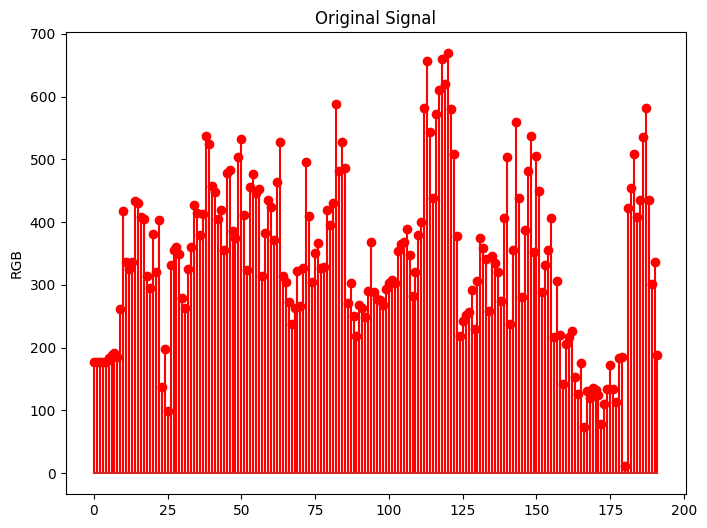

In [547]:
img = cv.imread('dogsmall.jpg')
row_pixels = img[2, :]
row_pixels
sums = np.sum(row_pixels, axis=1)
size = sums.shape[0]
# the indice are [0, 1, ..... 191]
indices = np.arange(size)

# plot the resulst
plt.figure(figsize = (8, 6))
plt.stem(indices, sums, 'r')
plt.ylabel('RGB')
plt.title('Original Signal')
plt.show()

In [548]:
# Numpy FFT and IFFT
np_dft = np.fft.fft(sums)
np_idft = np.fft.ifft(np_dft)

In [549]:
def dft(x):
    N = len(x)
    X = [0] * N
    for k in range(N):
        for n in range(N):
            # X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
            X[k] += x[n] * (math.cos(-2 * math.pi * k * n / N) - 1j * math.sin(2 * math.pi * k * n / N))

    return X

dft_row_pixels = dft(row_pixels)

In [550]:
def idft(X):
    N = len(X)
    x = [0] * N
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * cmath.exp(1j * 2 * math.pi * k * n / N)
        x[n] /= N
    return x

dft_row_pixels[2] *= 0.5
idft_row_pixels = idft(dft_row_pixels)
idft_row_pixels = np.mean(idft_row_pixels, axis=1)

/Users/zee/.pyenv/versions/3.9.10/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


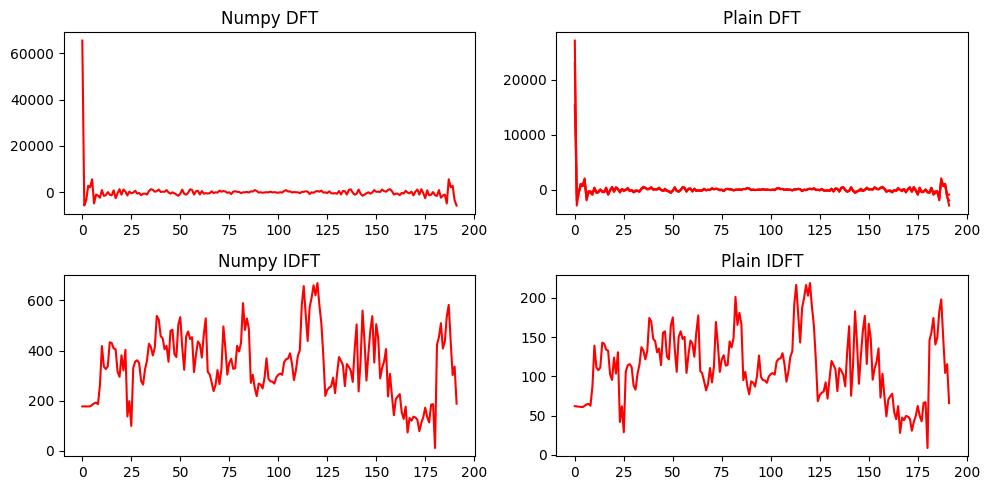

In [551]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs = axs.flatten()

axs[0].plot(indices, np_dft, 'r')
axs[0].set_title('Numpy DFT')

axs[1].plot(indices, dft_row_pixels, 'r')
axs[1].set_title('Plain DFT')

axs[2].plot(indices, np_idft, 'r')
axs[2].set_title('Numpy IDFT')

axs[3].plot(indices, idft_row_pixels, 'r')
axs[3].set_title('Plain IDFT')

plt.tight_layout()
plt.show()

# Q2

In [552]:
#  Generate a random signal
num_components = 5
x = np.linspace(-5, 5, 100)
function = np.zeros_like(x)

for i in range(num_components):
    amplitude = np.random.uniform(0.5, 1.5)
    frequency = np.random.uniform(0.5, 1.5)
    phase = np.random.uniform(0, 2*np.pi)
    function += amplitude * np.sin(2*np.pi*frequency*x + phase)

In [553]:
# Get some random samples from the signal
num_samples = 50
sample_locs = np.random.uniform(-5, 5, num_samples)
samples = function[np.searchsorted(x, sample_locs)]

# polynomial fit
degree = 3
poly_fit = np.zeros((num_samples, degree+1))
for i in range(degree+1):
    poly_fit[:,i] = sample_locs**i

# Solve for the polynomial coefficients
weights = np.linalg.lstsq(poly_fit, samples, rcond=None)[0]

grid = np.linspace(-5, 5, 100)
fit = np.zeros_like(grid)
for i in range(degree+1):
    fit += weights[i] * grid**i

# get thhe error
error = np.linalg.norm(function - fit)
error

15.630697911681455

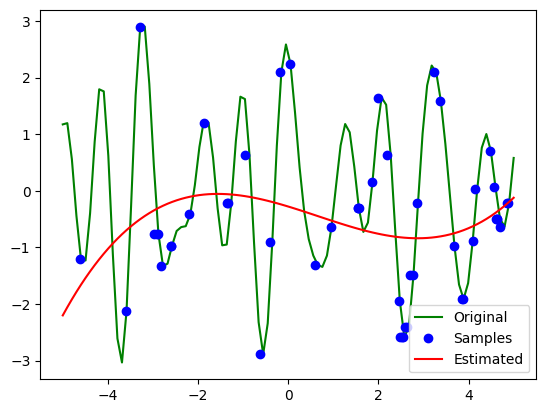

In [554]:
plt.plot(x, function, 'g-', label='Original')
plt.plot(sample_locs, samples, 'bo', label='Samples')
plt.plot(grid, fit, 'r-', label='Estimated')

plt.legend()
plt.show()

# Q3

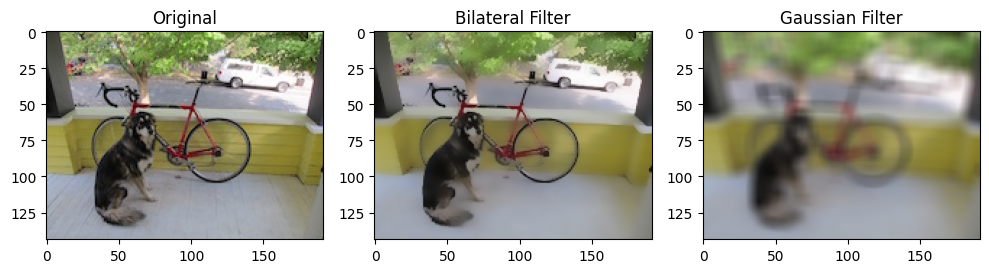

In [555]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('dogsmall.jpg')

# Apply bilateral filter
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# Apply Gaussian filter
gaussian = cv2.GaussianBlur(img, (9, 9), 75)


# Plot the original, bilateral, and Gaussian filtered images side by side
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
axs[1].set_title('Bilateral Filter')
axs[2].imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
axs[2].set_title('Gaussian Filter')
plt.tight_layout()
plt.show()

It seems like the dog has a significant edge.

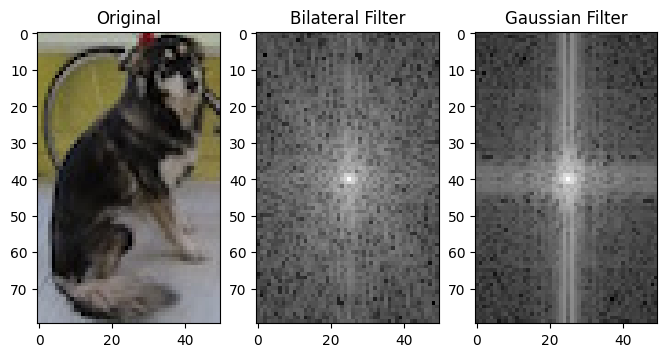

In [556]:
dog_o = img[55:135, 30:80]
dog_b = bilateral[55:135, 30:80]
dog_g = gaussian[55:135, 30:80]

dog_b = cv2.cvtColor(np.float32(dog_b), cv2.COLOR_BGR2GRAY)
dog_g = cv2.cvtColor(np.float32(dog_g), cv2.COLOR_BGR2GRAY)

dog_b = cv.dft(dog_b, flags=cv.DFT_COMPLEX_OUTPUT)
dog_b_shift = np.fft.fftshift(dog_b)
dog_b_fourier = 20*np.log(cv2.magnitude(dog_b_shift[:,:,0], dog_b_shift[:,:,1]))

dog_g = cv.dft(dog_g, flags=cv.DFT_COMPLEX_OUTPUT)
dog_g_shift = np.fft.fftshift(dog_g)
dog_g_fourier = 20*np.log(cv2.magnitude(dog_g_shift[:,:,0], dog_g_shift[:,:,1]))

fig, axs = plt.subplots(1, 3, figsize=(8, 8))
axs[0].imshow(cv2.cvtColor(dog_o, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(dog_b_fourier, cmap='gray')
axs[1].set_title('Bilateral Filter')
axs[2].imshow(dog_g_fourier, cmap='gray')
axs[2].set_title('Gaussian Filter')
plt.show()